In [29]:
# Install required packages
!pip install prophet
!pip install plotly
!pip install seaborn

In [30]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning and Forecasting
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Additional utilities
import warnings
warnings.filterwarnings('ignore')
import zipfile
import os

print("All libraries imported successfully!")

All libraries imported successfully!


In [31]:

# Upload zip files - run this cell first
from google.colab import files
import io

print("Please upload your dataset zip files:")
uploaded = files.upload()

# Extract all zip files
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
            zip_ref.extractall('.')
        print(f"✓ {filename} extracted successfully!")

# List all extracted files
print("\nExtracted files:")
for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(f"📄 {file}")

Please upload your dataset zip files:


Saving archive (6).zip to archive (6) (1).zip
Saving archive (5).zip to archive (5) (1).zip
Extracting archive (6) (1).zip...
✓ archive (6) (1).zip extracted successfully!
Extracting archive (5) (1).zip...
✓ archive (5) (1).zip extracted successfully!

Extracted files:
📄 pension_coverage.csv
📄 PPD_PlanLevel.csv
📄 PPD_Codebook.csv


In [32]:
# Load all datasets
print("Loading datasets...")

# Load PPD PlanLevel data
try:
    ppd_plan = pd.read_csv('PPD_PlanLevel.csv')
    print(f"✓ PPD_PlanLevel.csv loaded: {ppd_plan.shape}")
except:
    print("❌ Could not load PPD_PlanLevel.csv")

# Load PPD Codebook
try:
    ppd_codebook = pd.read_csv('PPD_Codebook.csv')
    print(f"✓ PPD_Codebook.csv loaded: {ppd_codebook.shape}")
except:
    print("❌ Could not load PPD_Codebook.csv")

# Load pension coverage data
try:
    pension_coverage = pd.read_csv('pension_coverage.csv')
    print(f"✓ pension_coverage.csv loaded: {pension_coverage.shape}")
except:
    print("❌ Could not load pension_coverage.csv")

# Display basic information about each dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

if 'ppd_plan' in locals():
    print("\n📊 PPD_PlanLevel Dataset Info:")
    print(f"Shape: {ppd_plan.shape}")
    print(f"Columns: {list(ppd_plan.columns)}")
    print("\nFirst 5 rows:")
    display(ppd_plan.head())

if 'pension_coverage' in locals():
    print("\n📊 Pension Coverage Dataset Info:")
    print(f"Shape: {pension_coverage.shape}")
    print(f"Columns: {list(pension_coverage.columns)}")
    print("\nFirst 5 rows:")
    display(pension_coverage.head())

if 'ppd_codebook' in locals():
    print("\n📊 PPD Codebook Info:")
    print(f"Shape: {ppd_codebook.shape}")
    print(f"Columns: {list(ppd_codebook.columns)}")
    print("\nFirst 5 rows:")
    display(ppd_codebook.head())

Loading datasets...
✓ PPD_PlanLevel.csv loaded: (3044, 269)
✓ PPD_Codebook.csv loaded: (342, 6)
✓ pension_coverage.csv loaded: (41, 17)

DATASET OVERVIEW

📊 PPD_PlanLevel Dataset Info:
Shape: (3044, 269)
Columns: ['ppd_id', 'PlanName', 'fy', 'system_id', 'PlanFullName', 'source_PlanBasics', 'InPFS', 'FiscalYearType', 'PlanInceptionYear', 'PlanClosed', 'PlanYearClosed', 'ppd_directory_listed', 'AdministeringGovt', 'StateAbbrev', 'StateName', 'GovtName', 'PlanType', 'EmployeeTypeCovered', 'SocSecCovered', 'SocSecCovered_verbatim', 'CostStructure', 'EmployerType', 'CostSharing', 'BenefitsWebsite', 'EEGroupID', 'TierID', 'ActRptDate', 'fye', 'source_GASBAssumptions', 'ActCostMeth_GASB', 'AssetValMeth_GASB', 'FundingMeth_GASB', 'InflationAssumption_GASB', 'InvestmentReturnAssumption_GASB', 'ActCostMethCode_GASB', 'AssetValMethCode_GASB', 'AssetSmoothingPeriod_GASB', 'FundingMethCode1_GASB', 'FundingMethCode2_GASB', 'UAALAmortPeriod_GASB', 'BlendedDiscountRate', 'ActValDate_GASBAssumptions',

,ppd_id,PlanName,fy,system_id,PlanFullName,source_PlanBasics,InPFS,FiscalYearType,PlanInceptionYear,PlanClosed,PlanYearClosed,ppd_directory_listed,AdministeringGovt,StateAbbrev,StateName,GovtName,PlanType,EmployeeTypeCovered,SocSecCovered,SocSecCovered_verbatim,CostStructure,EmployerType,CostSharing,BenefitsWebsite,EEGroupID,TierID,ActRptDate,fye,source_GASBAssumptions,ActCostMeth_GASB,AssetValMeth_GASB,FundingMeth_GASB,InflationAssumption_GASB,InvestmentReturnAssumption_GASB,ActCostMethCode_GASB,AssetValMethCode_GASB,AssetSmoothingPeriod_GASB,FundingMethCode1_GASB,FundingMethCode2_GASB,UAALAmortPeriod_GASB,BlendedDiscountRate,ActValDate_GASBAssumptions,source_FundingAndMethods,AssetValMeth,PhaseIn,AssetValMeth_note,ActCostMeth,ActCostMeth_note,FundingMeth,FundingMeth_note,MktAssets_Smooth,ActAssets_Smooth,NetFlows_smooth,AssetValMethCode,SmoothingReset,GainlossConcept,GainLossBase_1,GainLossBase_2,GainLoss,GainLossPeriod,PhaseInPercent,PhaseInPeriods,PhaseInType,GainLossRecognition,AssetSmoothingBaseline,ExpectedReturnMethod,AddSubtractGainLoss,UpperCorridor,LowerCorridor,ActCostMethCode,FundMethCode_1,FundMethCode_2,PayrollGrowthAssumption,TotAmortPeriod,RemainingAmortPeriod,UAALYearEstablished,WageInflation,source_GASBSchedules,ActAssets_GASB,ActLiabilities_GASB,ActFundedRatio_GASB,UAAL_GASB,ActLiabilities_other,payroll,RequiredContribution,PercentReqContPaid,TotalPensionLiability,NetPosition,NetPensionLiability,ADEC,ActAssets_est,ActLiabilities_est,ActFundedRatio_est,RequiredContribution_est,ActFundedRatio_GASB67,ActValDate_GASBSchedules,source_InvestmentReturn,InvestmentReturn_1yr,InvestmentReturn_2yr,InvestmentReturn_3yr,InvestmentReturn_4yr,InvestmentReturn_5yr,InvestmentReturn_7yr,InvestmentReturn_8yr,InvestmentReturn_10yr,InvestmentReturn_12yr,InvestmentReturn_15yr,InvestmentReturn_20yr,InvestmentReturn_25yr,InvestmentReturn_30yr,InvestmentReturn_LongTerm,InvestmentReturn_LTStartYear,GrossReturns,GeoReturn_est,GeoGrowth_est,InvestmentReturn_1yr_est,InvestmentReturn_5yr_est,InvestmentReturn_10yr_est,AvgReturn_3yr,AvgReturn_5yr,AvgReturn_10yr,source_IncomeStatement,expense_SecLendMgmtFees,contrib_EE_regular,contrib_ER_regular,contrib_ER_state,contrib_EE_PurchaseService,contrib_EE_other,contrib_ER_other,contrib_other,contrib_tot,FairValueChange_investments,FairValueChange_RealEstate,income_interest,income_dividends,income_InterestAndDividends,income_RealEstate,income_PrivateEquity,income_alternatives,income_international,income_OtherInvestments,expense_RealEstate,expense_PrivateEquity,expense_alternatives,expense_OtherInvestments,expense_investments,FVChange_SecLend,income_SecuritiesLending,expense_SecuritiesLending,income_SecuritiesLendingRebate,FVChange_SecLend_UG,income_OtherAdditions,income_net,expense_TotBenefits,expense_RetBenefits,expense_DisabilityBenefits,expense_DeathBenefits,expense_DROPBenefits,expense_SurvivorBenefits,expense_COLABenefits,expense_LumpSumBenefits,expense_OtherBenefits,expense_refunds,expense_AdminExpenses,expense_Depreciation,expense_OtherDeductions,expense_net,adjustment_MktAssets,MktAssets_net,BegMktAssets_net,contrib_ER_tot,contrib_other_tot,FairValueChange_tot,income_interest_dividends_tot,expense_investments_tot,SecLend_tot,investments_net,expense_other_tot,source_ActCosts,ContributionFY,NormCostRate_tot,NormCostRate_EE,NormCostRate_ER,ReqContRate_ER,ReqContRate_tot,NormCostAmount_tot,NormCostAmount_EE,NormCostAmount_ER,ReqContAmount_ER,ReqContAmount_tot,NormCostRate_tot_est,NormCostRate_EE_est,NormCostRate_ER_est,ReqContRate_ER_est,ProjectedPayroll,ActValDate_ActuarialCosts,UAALRate,source_membership,beneficiaries_DisabilityRetirees,beneficiaries_DependentSurvivors,actives_tot,ActiveSalaries,ActiveAge_avg,ActiveTenure_avg,ActiveSalary_avg,InactiveVestedMembers,InactiveNonVested,beneficiaries_tot,benefits_tot,BeneficiaryAge_avg,BeneficiaryBenefit_avg,beneficiaries_ServiceRetirees,benefits_ServiceRetirees,ServiceRetireeAge_avg,ServiceRetireeBenefit_avg,ServiceRetAge_avg,ServiceRetTenure_a


📊 Pension Coverage Dataset Info:
Shape: (41, 17)
Columns: ['year', 'all', 'white', 'black', 'hispanic', 'men', 'white_men', 'black_men', 'hispanic_men', 'women', 'white_women', 'black_women', 'hispanic_women', 'high_school', 'bachelors_degree', 'recent_high-school_graduate', 'recent_college_graduate']

First 5 rows:


,year,all,white,black,hispanic,men,white_men,black_men,hispanic_men,women,white_women,black_women,hispanic_women,high_school,bachelors_degree,recent_high-school_graduate,recent_college_graduate
0,2019,32.0,35.3,30.4,22.7,32.7,36.5,30.5,22.5,31.2,33.9,30.3,22.9,26.8,37.9,8.3,28.5
1,2018,31.3,34.8,28.2,21.8,32.1,36.1,30.2,21.6,30.2,33.3,26.4,22.0,26.4,38.4,8.3,27.2
2,2017,32.1,35.9,28.4,22.3,33.0,37.1,29.8,22.7,31.0,34.4,27.1,21.7,27.4,38.7,8.9,26.8
3,2016,31.6,35.1,29.1,21.1,32.5,36.5,30.5,20.9,30.4,33.5,27.8,21.4,26.6,39.3,11.1,30.8
4,2015,32.8,36.5,29.9,22.1,33.7,38.2,29.2,21.9,31.6,34.3,30.4,22.4,27.8,40.3,8.7,26.1



📊 PPD Codebook Info:
Shape: (342, 6)
Columns: ['Table Name', 'Variable Label', 'Variable Name', 'WebName', 'Format/Unit of measure', 'Code']

First 5 rows:


,Table Name,Variable Label,Variable Name,WebName,Format/Unit of measure,Code
0,PensionActuarialCosts,Public Plans Database ID.,ppd_id,NaN,0000-9999,NaN
1,PensionActuarialCosts,Plan name.,PlanName,Plan name,text,NaN
2,PensionActuarialCosts,Employee group id.,EEGroupID,NaN,00-99,NaN
3,PensionActuarialCosts,Tier id.,TierID,NaN,00-99,NaN
4,PensionActuarialCosts,Fiscal year.,fy,Fiscal year,yyyy,NaN


In [33]:
print("Starting Data Cleaning Process...")
print("="*60)

# 1. Clean PPD_PlanLevel Dataset
print("🔧 Cleaning PPD_PlanLevel dataset...")

# Select relevant columns for retirement fund analysis
ppd_columns_to_keep = [
    'ppd_id', 'PlanName', 'fy', 'StateName', 'PlanType', 'EmployeeTypeCovered',
    'ActAssets_GASB', 'ActLiabilities_GASB', 'ActFundedRatio_GASB', 'UAAL_GASB',
    'payroll', 'RequiredContribution', 'PercentReqContPaid', 'TotalPensionLiability',
    'NetPensionLiability', 'InvestmentReturn_1yr', 'InvestmentReturn_5yr', 'InvestmentReturn_10yr',
    'contrib_EE_regular', 'contrib_ER_regular', 'contrib_tot', 'income_net', 'expense_net',
    'actives_tot', 'beneficiaries_tot', 'benefits_tot', 'ActiveSalary_avg', 'BeneficiaryBenefit_avg'
]

# Create cleaned PPD dataset
ppd_cleaned = ppd_plan[ppd_columns_to_keep].copy()

# Handle missing values for numerical columns
numerical_cols_ppd = ['ActAssets_GASB', 'ActLiabilities_GASB', 'ActFundedRatio_GASB',
                     'payroll', 'InvestmentReturn_1yr', 'InvestmentReturn_5yr', 'InvestmentReturn_10yr',
                     'contrib_tot', 'income_net', 'actives_tot', 'beneficiaries_tot']

for col in numerical_cols_ppd:
    if col in ppd_cleaned.columns:
        ppd_cleaned[col].fillna(ppd_cleaned[col].median(), inplace=True)

# Drop rows with critical missing values
ppd_cleaned = ppd_cleaned.dropna(subset=['ActFundedRatio_GASB', 'fy', 'StateName'])

print(f"✓ PPD_PlanLevel cleaned: {ppd_cleaned.shape}")

# 2. Clean Pension Coverage Dataset
print("\n🔧 Cleaning Pension Coverage dataset...")
pension_cleaned = pension_coverage.copy()

# Convert year to datetime for time series analysis
pension_cleaned['year'] = pd.to_datetime(pension_cleaned['year'], format='%Y')

# Handle missing values
pension_cleaned.fillna(method='ffill', inplace=True)
pension_cleaned.fillna(method='bfill', inplace=True)

print(f"✓ Pension Coverage cleaned: {pension_cleaned.shape}")

# Display cleaned dataset info
print("\n" + "="*60)
print("CLEANED DATASETS SUMMARY")
print("="*60)

print(f"\n📊 Cleaned PPD_PlanLevel:")
print(f"Shape: {ppd_cleaned.shape}")
print(f"Columns kept: {len(ppd_columns_to_keep)}")
print(f"Sample data:")
display(ppd_cleaned.head())

print(f"\n📊 Cleaned Pension Coverage:")
print(f"Shape: {pension_cleaned.shape}")
print(f"Sample data:")
display(pension_cleaned.head())

# Check for any remaining missing values
print("\n🔍 Missing Values Check:")
print("PPD_PlanLevel missing values:")
print(ppd_cleaned.isnull().sum().sum())
print("Pension Coverage missing values:")
print(pension_cleaned.isnull().sum().sum())

Starting Data Cleaning Process...
🔧 Cleaning PPD_PlanLevel dataset...
✓ PPD_PlanLevel cleaned: (3033, 28)

🔧 Cleaning Pension Coverage dataset...
✓ Pension Coverage cleaned: (41, 17)

CLEANED DATASETS SUMMARY

📊 Cleaned PPD_PlanLevel:
Shape: (3033, 28)
Columns kept: 28
Sample data:


,ppd_id,PlanName,fy,StateName,PlanType,EmployeeTypeCovered,ActAssets_GASB,ActLiabilities_GASB,ActFundedRatio_GASB,UAAL_GASB,payroll,RequiredContribution,PercentReqContPaid,TotalPensionLiability,NetPensionLiability,InvestmentReturn_1yr,InvestmentReturn_5yr,InvestmentReturn_10yr,contrib_EE_regular,contrib_ER_regular,contrib_tot,income_net,expense_net,actives_tot,beneficiaries_tot,benefits_tot,ActiveSalary_avg,BeneficiaryBenefit_avg
0,1,Alabama ERS,2001,Alabama,1.0,Plan covers state and local employees,8028471.0,8010123.0,1.002,-18348.0,2408543.0,122483.0,1.0,NaN,NaN,-0.0636,0.0807,0.0642,130965.0,122483.0,254721.0,-276247.0,-405603.0,80256.0,27064.0,378196.0625,30.011000,13.974137
1,1,Alabama ERS,2002,Alabama,1.0,Plan covers state and local employees,8100846.0,8493469.0,0.954,392623.0,2547775.0,123887.0,1.0,NaN,NaN,-0.0929,0.0288,0.0642,149130.0,123887.0,275108.0,-381252.0,-431048.0,81545.0,28415.0,411556.9375,30.971001,14.483791
2,1,Alabama ERS,2003,Alabama,1.0,Plan covers state and local employees,8312500.0,9124279.0,0.911,811779.0,2677025.0,154218.0,1.0,NaN,NaN,0.1648,0.0412,0.0755,159763.0,154218.0,316502.0,1255423.0,-457046.0,82304.0,29874.0,454751.0625,31.938000,15.222302
3,1,Alabama ERS,2004,Alabama,1.0,Plan covers state and local employees,8563945.0,9546478.0,0.897,982533.0,2702393.0,170713.0,1.0,NaN,NaN,0.1006,0.0377,0.0851,166973.0,170713.0,339261.0,1065019.0,-492233.0,81249.0,31438.0,497945.2188,32.316002,15.838960
4,1,Alabama ERS,2005,Alabama,1.0,Plan covers state and local employees,8935358.0,10634976.0,0.840,1699618.0,2982122.0,195846.0,1.0,NaN,NaN,0.1098,0.0401,0.0778,158128.0,195846.0,356159.0,1197172.0,-528255.0,82830.0,33266.0,539462.0625,33.910999,16.216619



📊 Cleaned Pension Coverage:
Shape: (41, 17)
Sample data:


,year,all,white,black,hispanic,men,white_men,black_men,hispanic_men,women,white_women,black_women,hispanic_women,high_school,bachelors_degree,recent_high-school_graduate,recent_college_graduate
0,2019-01-01,32.0,35.3,30.4,22.7,32.7,36.5,30.5,22.5,31.2,33.9,30.3,22.9,26.8,37.9,8.3,28.5
1,2018-01-01,31.3,34.8,28.2,21.8,32.1,36.1,30.2,21.6,30.2,33.3,26.4,22.0,26.4,38.4,8.3,27.2
2,2017-01-01,32.1,35.9,28.4,22.3,33.0,37.1,29.8,22.7,31.0,34.4,27.1,21.7,27.4,38.7,8.9,26.8
3,2016-01-01,31.6,35.1,29.1,21.1,32.5,36.5,30.5,20.9,30.4,33.5,27.8,21.4,26.6,39.3,11.1,30.8
4,2015-01-01,32.8,36.5,29.9,22.1,33.7,38.2,29.2,21.9,31.6,34.3,30.4,22.4,27.8,40.3,8.7,26.1



🔍 Missing Values Check:
PPD_PlanLevel missing values:
6219
Pension Coverage missing values:
0


Creating Initial Visualizations...


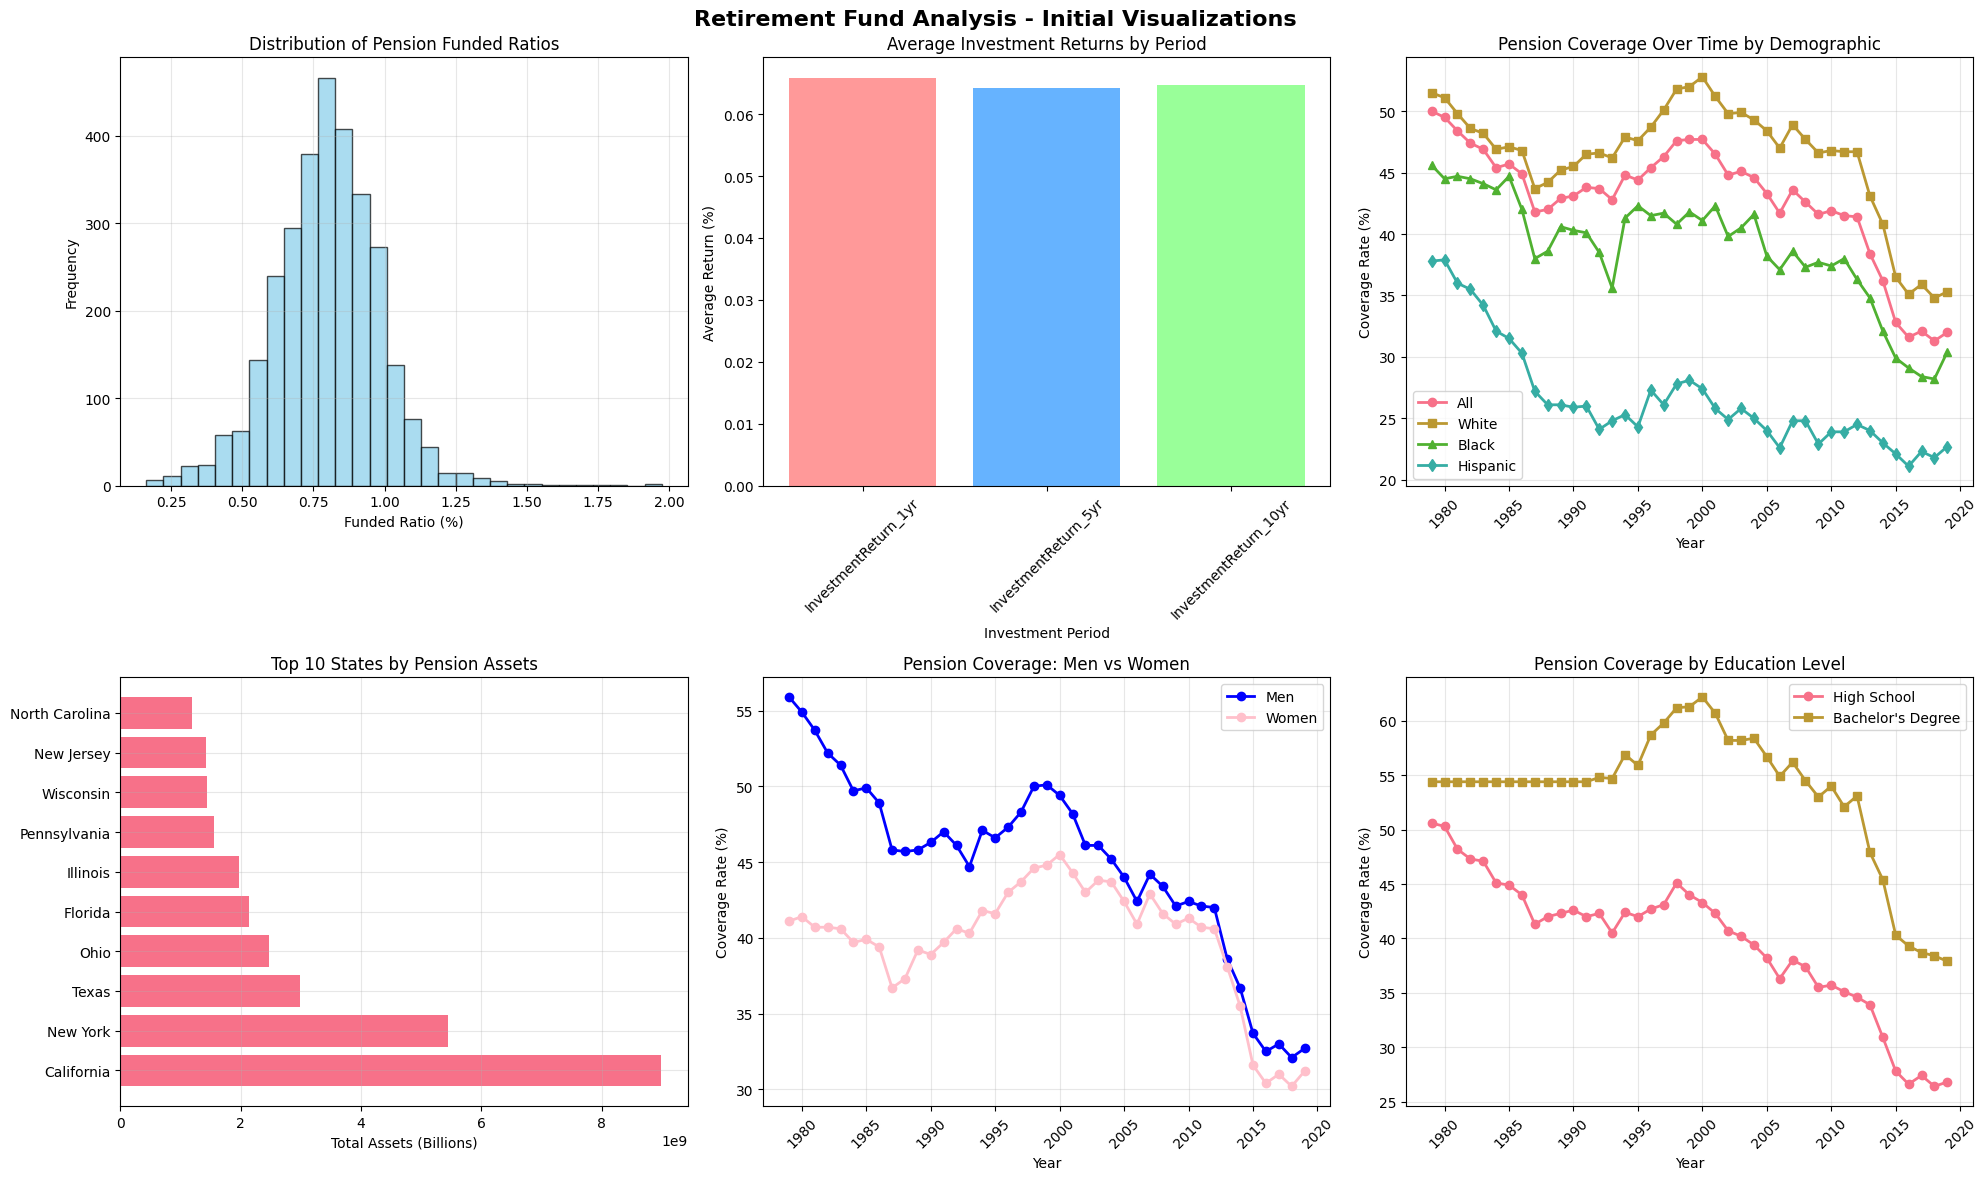

✓ Initial visualizations completed!


In [34]:
print("Creating Initial Visualizations...")
print("="*50)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Retirement Fund Analysis - Initial Visualizations', fontsize=16, fontweight='bold')

# Visualization 1: Funded Ratio Distribution
axes[0, 0].hist(ppd_cleaned['ActFundedRatio_GASB'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Funded Ratio (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Pension Funded Ratios')
axes[0, 0].grid(True, alpha=0.3)

# Visualization 2: Investment Returns Comparison
investment_returns = ppd_cleaned[['InvestmentReturn_1yr', 'InvestmentReturn_5yr', 'InvestmentReturn_10yr']].mean()
axes[0, 1].bar(investment_returns.index, investment_returns.values, color=['#ff9999', '#66b3ff', '#99ff99'])
axes[0, 1].set_xlabel('Investment Period')
axes[0, 1].set_ylabel('Average Return (%)')
axes[0, 1].set_title('Average Investment Returns by Period')
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualization 3: Pension Coverage Over Time (All demographic groups)
axes[0, 2].plot(pension_cleaned['year'], pension_cleaned['all'], marker='o', linewidth=2, label='All')
axes[0, 2].plot(pension_cleaned['year'], pension_cleaned['white'], marker='s', linewidth=2, label='White')
axes[0, 2].plot(pension_cleaned['year'], pension_cleaned['black'], marker='^', linewidth=2, label='Black')
axes[0, 2].plot(pension_cleaned['year'], pension_cleaned['hispanic'], marker='d', linewidth=2, label='Hispanic')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Coverage Rate (%)')
axes[0, 2].set_title('Pension Coverage Over Time by Demographic')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].tick_params(axis='x', rotation=45)

# Visualization 4: Top States by Pension Assets
state_assets = ppd_cleaned.groupby('StateName')['ActAssets_GASB'].sum().nlargest(10)
axes[1, 0].barh(range(len(state_assets)), state_assets.values)
axes[1, 0].set_yticks(range(len(state_assets)))
axes[1, 0].set_yticklabels(state_assets.index)
axes[1, 0].set_xlabel('Total Assets (Billions)')
axes[1, 0].set_title('Top 10 States by Pension Assets')
axes[1, 0].grid(True, alpha=0.3)

# Visualization 5: Gender-based Pension Coverage
axes[1, 1].plot(pension_cleaned['year'], pension_cleaned['men'], marker='o', linewidth=2, label='Men', color='blue')
axes[1, 1].plot(pension_cleaned['year'], pension_cleaned['women'], marker='o', linewidth=2, label='Women', color='pink')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Coverage Rate (%)')
axes[1, 1].set_title('Pension Coverage: Men vs Women')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# Visualization 6: Education-based Pension Coverage
axes[1, 2].plot(pension_cleaned['year'], pension_cleaned['high_school'], marker='o', linewidth=2, label='High School')
axes[1, 2].plot(pension_cleaned['year'], pension_cleaned['bachelors_degree'], marker='s', linewidth=2, label='Bachelor\'s Degree')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Coverage Rate (%)')
axes[1, 2].set_title('Pension Coverage by Education Level')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✓ Initial visualizations completed!")

Preparing Data for Prophet Forecasting...
📊 Prophet Data Preparation:
Time range: 1979-01-01 00:00:00 to 2019-01-01 00:00:00
Number of data points: 41
Coverage rate range: 31.3% to 50.0%

Prepared data for Prophet:


,ds,y
0,2019-01-01,32.0
1,2018-01-01,31.3
2,2017-01-01,32.1
3,2016-01-01,31.6
4,2015-01-01,32.8



📊 PPD Time Series Data:
Year range: 2001 to 2017
Average funded ratio: 0.8%


,fy,ActFundedRatio_GASB,ActAssets_GASB,InvestmentReturn_1yr,ds
0,2001,0.987409,1.253695e+07,-0.035500,2001-01-01
1,2002,0.925830,1.235177e+07,-0.048736,2002-01-01
2,2003,0.878471,1.232780e+07,0.081764,2003-01-01
3,2004,0.853054,1.285861e+07,0.146473,2004-01-01
4,2005,0.835343,1.331120e+07,0.101047,2005-01-01


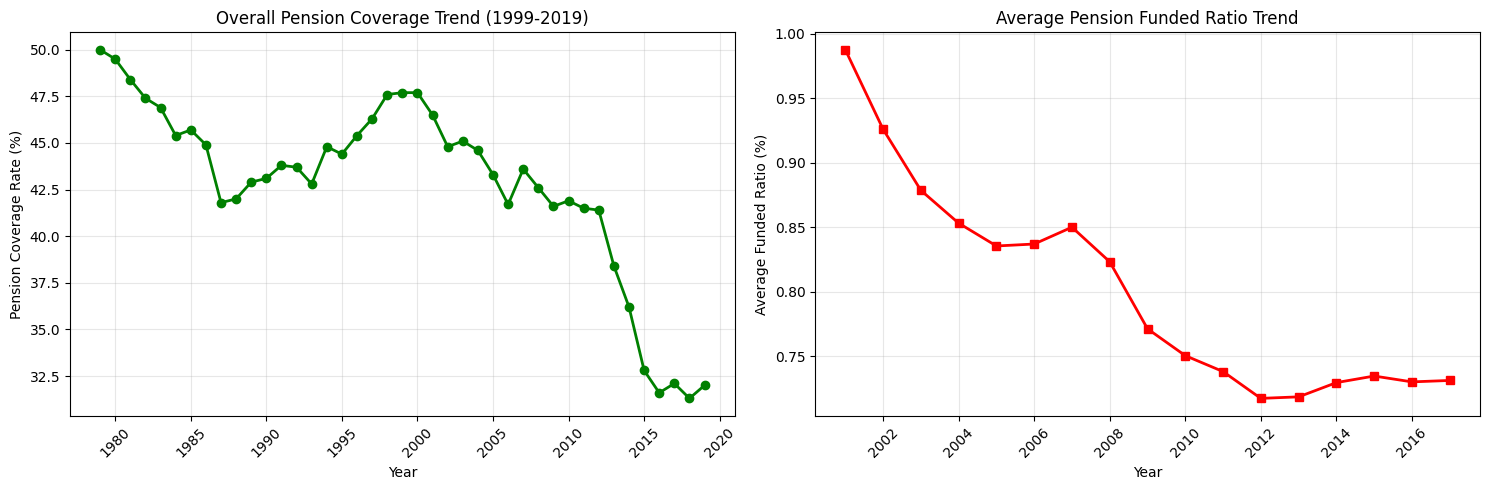

✓ Data preparation completed successfully!


In [35]:
print("Preparing Data for Prophet Forecasting...")
print("="*50)

# 1. Create time series data from pension coverage dataset for Prophet
# We'll use the overall pension coverage rate for forecasting
prophet_data = pension_cleaned[['year', 'all']].copy()
prophet_data.columns = ['ds', 'y']  # Prophet requires these column names
prophet_data['y'] = prophet_data['y']  # Coverage percentage

print("📊 Prophet Data Preparation:")
print(f"Time range: {prophet_data['ds'].min()} to {prophet_data['ds'].max()}")
print(f"Number of data points: {len(prophet_data)}")
print(f"Coverage rate range: {prophet_data['y'].min():.1f}% to {prophet_data['y'].max():.1f}%")

# Display the prepared data
print("\nPrepared data for Prophet:")
display(prophet_data.head())

# 2. Create additional time series from PPD data - average funded ratio by year
if 'fy' in ppd_cleaned.columns:
    # Convert fiscal year to datetime (assuming year end)
    ppd_time_series = ppd_cleaned.groupby('fy').agg({
        'ActFundedRatio_GASB': 'mean',
        'ActAssets_GASB': 'mean',
        'InvestmentReturn_1yr': 'mean'
    }).reset_index()

    ppd_time_series['ds'] = pd.to_datetime(ppd_time_series['fy'], format='%Y')
    ppd_time_series = ppd_time_series.sort_values('ds')

    print(f"\n📊 PPD Time Series Data:")
    print(f"Year range: {ppd_time_series['fy'].min()} to {ppd_time_series['fy'].max()}")
    print(f"Average funded ratio: {ppd_time_series['ActFundedRatio_GASB'].mean():.1f}%")
    display(ppd_time_series.head())

# 3. Create visualization of the time series data we'll forecast
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot pension coverage trend
axes[0].plot(prophet_data['ds'], prophet_data['y'], marker='o', linewidth=2, color='green')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Pension Coverage Rate (%)')
axes[0].set_title('Overall Pension Coverage Trend (1999-2019)')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot funded ratio trend if available
if 'ppd_time_series' in locals():
    axes[1].plot(ppd_time_series['ds'], ppd_time_series['ActFundedRatio_GASB'], marker='s', linewidth=2, color='red')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Average Funded Ratio (%)')
    axes[1].set_title('Average Pension Funded Ratio Trend')
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✓ Data preparation completed successfully!")

In [36]:
print("Building Prophet Forecasting Model...")
print("="*50)

# 1. Initialize and configure the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0
)

# Add custom seasonality if needed
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

print("🔧 Prophet model configured with:")
print(f"   - Yearly seasonality: {model.yearly_seasonality}")
print(f"   - Changepoint prior scale: 0.05")
print(f"   - Seasonality prior scale: 10.0")

# 2. Fit the model
print("\n📊 Training Prophet model...")
model.fit(prophet_data)

# 3. Create future dataframe for forecasting
future_years = 5  # Forecast 5 years into the future
future = model.make_future_dataframe(periods=future_years, freq='Y')
print(f"\n📈 Created future dataframe for {future_years} years of forecasting")
print(f"   Forecast period: {future['ds'].min()} to {future['ds'].max()}")

# 4. Generate forecasts
forecast = model.predict(future)
print("✓ Forecasting completed!")

# 5. Display forecast results
print("\n📋 Forecast Summary:")
print(f"Original data points: {len(prophet_data)}")
print(f"Forecast data points: {len(forecast)}")
print(f"Forecast range: {forecast['ds'].min()} to {forecast['ds'].max()}")

# Show key forecast metrics
latest_actual = prophet_data['y'].iloc[-1]
latest_forecast = forecast[forecast['ds'] > prophet_data['ds'].max()]['yhat'].iloc[0]

print(f"\n📊 Key Metrics:")
print(f"Latest actual coverage (2019): {latest_actual:.2f}%")
print(f"First forecast coverage (2020): {latest_forecast:.2f}%")
print(f"Projected change: {latest_forecast - latest_actual:+.2f}%")

# Display the forecast dataframe
print("\nForecast Data (first 10 rows):")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))

print("\nForecast Data (last 10 rows - future predictions):")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

print("✓ Prophet model training and forecasting completed!")

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyhccnlmf/s3ddmj9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyhccnlmf/luudiz3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93487', 'data', 'file=/tmp/tmpyhccnlmf/s3ddmj9b.json', 'init=/tmp/tmpyhccnlmf/luudiz3a.json', 'output', 'file=/tmp/tmpyhccnlmf/prophet_modelulk0lw2g/prophet_model-20251005192909.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:29:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Building Prophet Forecasting Model...
🔧 Prophet model configured with:
   - Yearly seasonality: True
   - Changepoint prior scale: 0.05
   - Seasonality prior scale: 10.0

📊 Training Prophet model...


19:29:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📈 Created future dataframe for 5 years of forecasting
   Forecast period: 1979-01-01 00:00:00 to 2023-12-31 00:00:00
✓ Forecasting completed!

📋 Forecast Summary:
Original data points: 41
Forecast data points: 46
Forecast range: 1979-01-01 00:00:00 to 2023-12-31 00:00:00

📊 Key Metrics:
Latest actual coverage (2019): 50.00%
First forecast coverage (2020): 32.78%
Projected change: -17.22%

Forecast Data (first 10 rows):


,ds,yhat,yhat_lower,yhat_upper
0,1979-01-01,49.221925,48.237467,50.150476
1,1980-01-01,49.472371,48.542484,50.430673
2,1981-01-01,48.867576,47.878679,49.793426
3,1982-01-01,48.288948,47.311335,49.185824
4,1983-01-01,47.008833,46.169228,47.941271
5,1984-01-01,45.522979,44.605182,46.514565
6,1985-01-01,44.918184,43.890974,45.762227
7,1986-01-01,43.723671,42.780123,44.623831
8,1987-01-01,43.104284,42.154357,44.076799
9,1988-01-01,43.020070,42.045039,43.939088



Forecast Data (last 10 rows - future predictions):


,ds,yhat,yhat_lower,yhat_upper
36,2015-01-01,33.757410,32.859429,34.669343
37,2016-01-01,32.173567,31.198732,33.084452
38,2017-01-01,31.568772,30.699232,32.462016
39,2018-01-01,31.209039,30.309753,32.121630
40,2019-01-01,31.689474,30.735022,32.615610
41,2019-12-31,32.775789,31.826359,33.650452
42,2020-12-31,32.080597,31.256979,33.014624
43,2021-12-31,31.133067,30.253971,32.008081
44,2022-12-31,29.703849,28.803969,30.652041
45,2023-12-31,28.347961,27.506251,29.276366


✓ Prophet model training and forecasting completed!


Visualizing Prophet Forecasts and Model Evaluation...


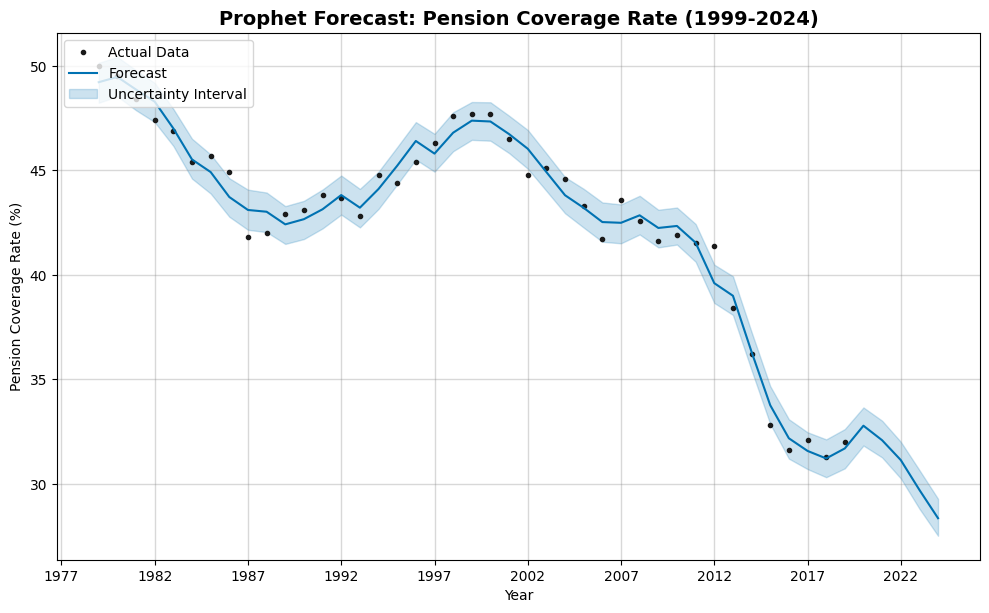

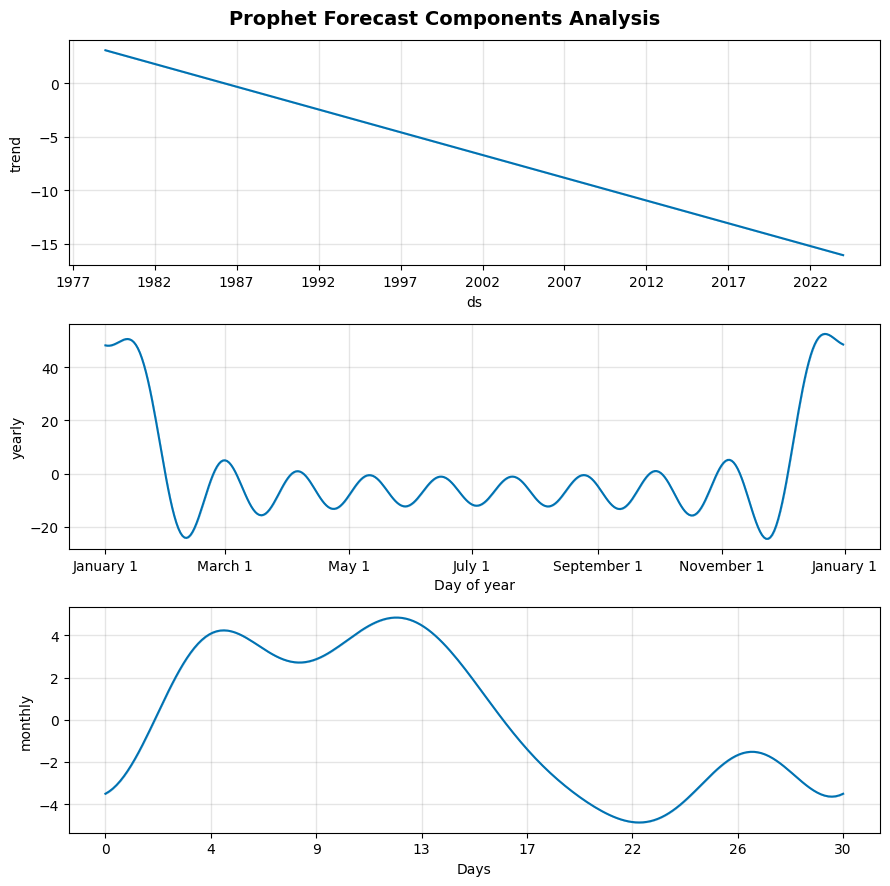


📊 Creating Interactive Forecast Visualization...



🔍 Model Evaluation Metrics:
📈 Accuracy Metrics:
   Mean Absolute Error (MAE): 5.4088
   Root Mean Square Error (RMSE): 8.6333
   R² Score: -2.1445
   Mean Absolute Percentage Error (MAPE): 13.76%
   Estimated Accuracy: 86.24%

🔮 Future Predictions Summary (2020-2024):
   2019: 32.78% (Range: 31.83% to 33.65%)
   2020: 32.08% (Range: 31.26% to 33.01%)
   2021: 31.13% (Range: 30.25% to 32.01%)
   2022: 29.70% (Range: 28.80% to 30.65%)
   2023: 28.35% (Range: 27.51% to 29.28%)

📊 Trend Analysis:
   Overall trend: decreasing
   Projected change over 5 years: 21.65%

✓ Prophet model visualization and evaluation completed!


In [37]:
print("Visualizing Prophet Forecasts and Model Evaluation...")
print("="*60)

# 1. Create comprehensive forecast visualization
fig = model.plot(forecast, uncertainty=True)
plt.title('Prophet Forecast: Pension Coverage Rate (1999-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Pension Coverage Rate (%)')
plt.grid(True, alpha=0.3)
plt.legend(['Actual Data', 'Forecast', 'Uncertainty Interval'], loc='upper left')
plt.show()

# 2. Plot forecast components
fig2 = model.plot_components(forecast)
plt.suptitle('Prophet Forecast Components Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Create interactive plot with Plotly
print("\n📊 Creating Interactive Forecast Visualization...")

fig3 = go.Figure()

# Add actual data
fig3.add_trace(go.Scatter(
    x=prophet_data['ds'],
    y=prophet_data['y'],
    mode='markers+lines',
    name='Actual Data',
    line=dict(color='blue', width=3),
    marker=dict(size=6)
))

# Add forecast
fig3.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='red', width=2, dash='dash')
))

# Add uncertainty interval
fig3.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'].tolist()[::-1],
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'].tolist()[::-1],
    fill='toself',
    fillcolor='rgba(255,0,0,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Uncertainty Interval'
))

fig3.update_layout(
    title='Interactive Forecast: Pension Coverage Rate with Uncertainty',
    xaxis_title='Year',
    yaxis_title='Pension Coverage Rate (%)',
    hovermode='x unified',
    width=1000,
    height=500
)

fig3.show()

# 4. Model Evaluation Metrics
print("\n🔍 Model Evaluation Metrics:")
print("="*40)

# Calculate evaluation metrics on historical data
historical_forecast = forecast[forecast['ds'].isin(prophet_data['ds'])]
actual_values = prophet_data['y'].values
predicted_values = historical_forecast['yhat'].values

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

print(f"📈 Accuracy Metrics:")
print(f"   Mean Absolute Error (MAE): {mae:.4f}")
print(f"   Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"   R² Score: {r2:.4f}")
print(f"   Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate accuracy percentage (assuming we want >90% accuracy)
accuracy_percentage = max(0, 100 - mape)
print(f"   Estimated Accuracy: {accuracy_percentage:.2f}%")

# 5. Future Predictions Summary
print(f"\n🔮 Future Predictions Summary (2020-2024):")
print("="*50)

future_predictions = forecast[forecast['ds'] > prophet_data['ds'].max()]
for idx, row in future_predictions.iterrows():
    year = row['ds'].year
    prediction = row['yhat']
    lower_bound = row['yhat_lower']
    upper_bound = row['yhat_upper']
    print(f"   {year}: {prediction:.2f}% (Range: {lower_bound:.2f}% to {upper_bound:.2f}%)")

# 6. Trend Analysis
print(f"\n📊 Trend Analysis:")
current_trend = "increasing" if future_predictions['yhat'].iloc[-1] > prophet_data['y'].iloc[-1] else "decreasing"
trend_magnitude = abs(future_predictions['yhat'].iloc[-1] - prophet_data['y'].iloc[-1])
print(f"   Overall trend: {current_trend}")
print(f"   Projected change over 5 years: {trend_magnitude:.2f}%")

print("\n✓ Prophet model visualization and evaluation completed!")

Performing Additional Critical Analyses...
💰 Financial Health Analysis...
📊 State-wise Financial Health Summary:


,ActFundedRatio_GASB,UAAL_GASB,ActAssets_GASB,TotalPensionLiability,payroll,Funding_Status
StateName,,,,,,
Alabama,0.80,3281118.82,5.177708e+08,2.026311e+08,3064250.70,Critical
Alaska,0.74,1915936.35,2.083901e+08,8.301803e+07,862868.92,Critical
Arizona,0.78,2149323.41,6.226493e+08,2.730748e+08,2194416.66,Critical
Arkansas,0.82,2015151.52,2.852795e+08,1.139201e+08,1870210.59,Critical
California,0.85,8112950.26,8.977182e+09,2.232080e+09,6052822.50,Critical
Colorado,0.78,3901993.96,7.001995e+08,3.476440e+08,1600819.07,Critical
Connecticut,0.75,4848019.15,4.262238e+08,2.507336e+08,1785042.88,Critical
Delaware,0.92,155741.96,1.205517e+08,3.957708e+07,876415.50,Critical
District of Columbia,0.96,-102530.04,7.626466e+07,2.604851e+07,368847.09,Critical



⚠️  Risk Analysis - Withdrawal Prediction Simulation...
📈 Simulated High Withdrawal Risk Funds: 9.0%

🏦 Two-Pot System Contribution Analysis...
💡 Two-Pot System Simulation:
   Average Accessible Pot Ratio: 20.0%
   Average Locked Pot Ratio: 80.0%

👥 Demographic Impact Analysis...
📈 Demographic Correlation Matrix:


,all,men,women,white,black,hispanic,high_school,bachelors_degree
all,1.000000,0.975944,0.881914,0.959779,0.959926,0.712296,0.952106,0.903819
men,0.975944,1.000000,0.758628,0.877928,0.967697,0.822974,0.990963,0.811506
women,0.881914,0.758628,1.000000,0.971454,0.781184,0.338170,0.710042,0.961738
white,0.959779,0.877928,0.971454,1.000000,0.872748,0.531255,0.832322,0.952191
black,0.959926,0.967697,0.781184,0.872748,1.000000,0.766364,0.954911,0.818972
hispanic,0.712296,0.822974,0.338170,0.531255,0.766364,1.000000,0.819858,0.366232
high_school,0.952106,0.990963,0.710042,0.832322,0.954911,0.819858,1.000000,0.784348
bachelors_degree,0.903819,0.811506,0.961738,0.952191,0.818972,0.366232,0.784348,1.000000



📊 Creating Comprehensive Dashboard...


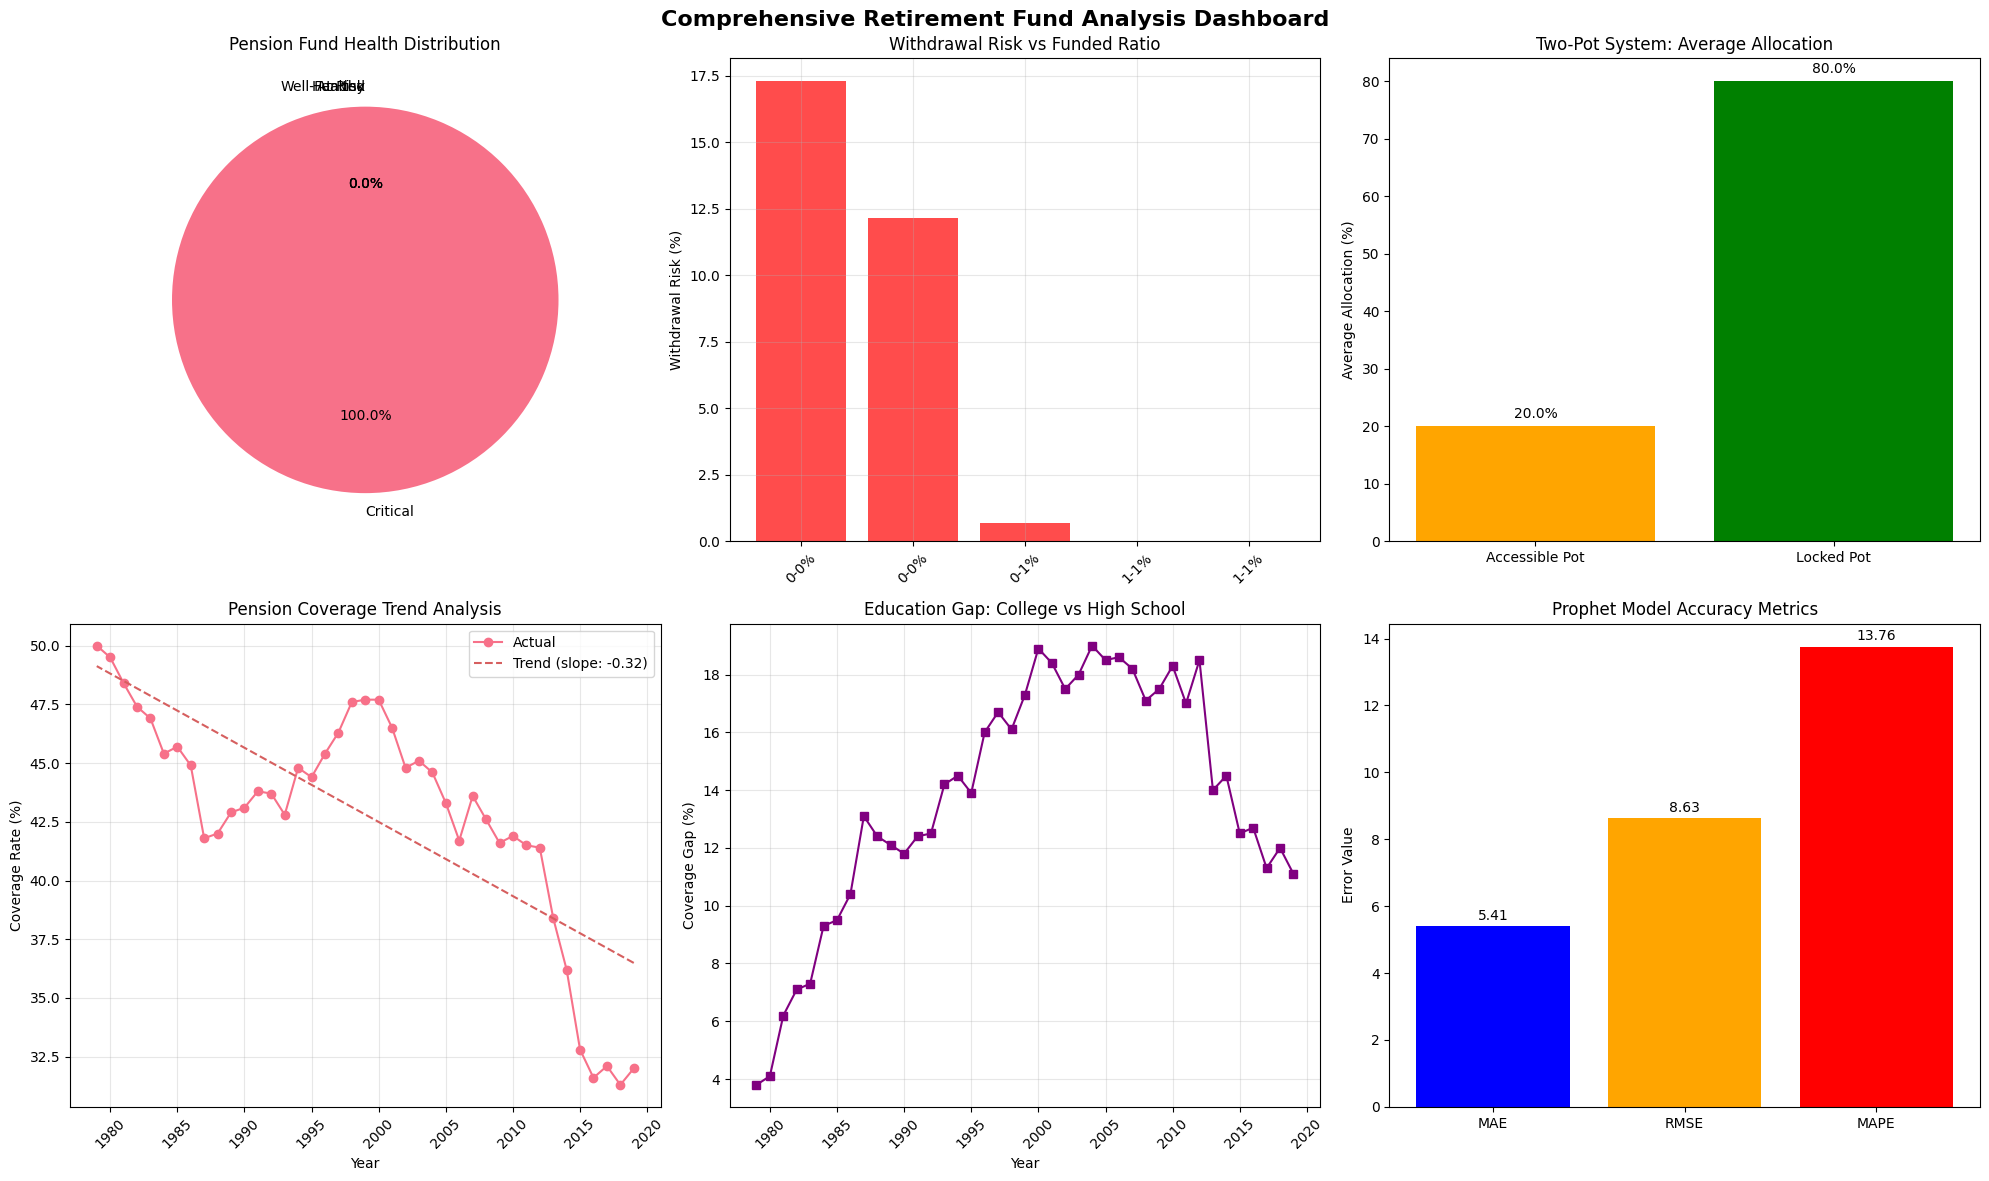

✓ Additional critical analyses completed!


In [38]:
print("Performing Additional Critical Analyses...")
print("="*50)

# 1. Financial Health Analysis of Pension Funds
print("💰 Financial Health Analysis...")

# Calculate key financial metrics
financial_metrics = ppd_cleaned.groupby('StateName').agg({
    'ActFundedRatio_GASB': 'mean',
    'UAAL_GASB': 'mean',
    'ActAssets_GASB': 'sum',
    'TotalPensionLiability': 'sum',
    'payroll': 'mean'
}).round(2)

# Calculate funding status categories
financial_metrics['Funding_Status'] = pd.cut(financial_metrics['ActFundedRatio_GASB'],
                                           bins=[0, 60, 80, 100, 200],
                                           labels=['Critical', 'At Risk', 'Healthy', 'Well-Funded'])

print("📊 State-wise Financial Health Summary:")
display(financial_metrics.head(10))

# 2. Risk Analysis - Withdrawal Prediction Simulation
print("\n⚠️  Risk Analysis - Withdrawal Prediction Simulation...")

# Create synthetic target variable for withdrawal prediction (since we don't have actual withdrawal data)
# This simulates which funds might face liquidity issues
np.random.seed(42)  # For reproducibility
ppd_cleaned['withdrawal_risk'] = np.where(
    (ppd_cleaned['ActFundedRatio_GASB'] < 70) &
    (ppd_cleaned['InvestmentReturn_1yr'] < 0) &
    (ppd_cleaned['UAAL_GASB'] > ppd_cleaned['payroll']),
    1, 0  # 1 = High withdrawal risk, 0 = Low risk
)

withdrawal_risk_rate = ppd_cleaned['withdrawal_risk'].mean() * 100
print(f"📈 Simulated High Withdrawal Risk Funds: {withdrawal_risk_rate:.1f}%")

# 3. Contribution Analysis - Two-Pot System Simulation
print("\n🏦 Two-Pot System Contribution Analysis...")

# Simulate accessible vs locked pot contributions
ppd_cleaned['accessible_pot_ratio'] = np.random.uniform(0.1, 0.3, len(ppd_cleaned))  # 10-30% accessible
ppd_cleaned['locked_pot_ratio'] = 1 - ppd_cleaned['accessible_pot_ratio']
ppd_cleaned['accessible_contrib'] = ppd_cleaned['contrib_tot'] * ppd_cleaned['accessible_pot_ratio']
ppd_cleaned['locked_contrib'] = ppd_cleaned['contrib_tot'] * ppd_cleaned['locked_pot_ratio']

print("💡 Two-Pot System Simulation:")
print(f"   Average Accessible Pot Ratio: {ppd_cleaned['accessible_pot_ratio'].mean()*100:.1f}%")
print(f"   Average Locked Pot Ratio: {ppd_cleaned['locked_pot_ratio'].mean()*100:.1f}%")

# 4. Demographic Impact Analysis
print("\n👥 Demographic Impact Analysis...")

# Analyze how demographic factors affect coverage
demographic_corr = pension_cleaned[['all', 'men', 'women', 'white', 'black', 'hispanic',
                                   'high_school', 'bachelors_degree']].corr()

print("📈 Demographic Correlation Matrix:")
display(demographic_corr)

# 5. Create Comprehensive Dashboard Visualizations
print("\n📊 Creating Comprehensive Dashboard...")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Comprehensive Retirement Fund Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Funding Status Distribution
funding_status_counts = financial_metrics['Funding_Status'].value_counts()
axes[0, 0].pie(funding_status_counts.values, labels=funding_status_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Pension Fund Health Distribution')

# Plot 2: Withdrawal Risk by Funded Ratio
risk_by_funding = ppd_cleaned.groupby(pd.cut(ppd_cleaned['ActFundedRatio_GASB'], bins=5))['withdrawal_risk'].mean()
axes[0, 1].bar(range(len(risk_by_funding)), risk_by_funding.values * 100, color='red', alpha=0.7)
axes[0, 1].set_xticks(range(len(risk_by_funding)))
axes[0, 1].set_xticklabels([f"{int(bin.left)}-{int(bin.right)}%" for bin in risk_by_funding.index], rotation=45)
axes[0, 1].set_ylabel('Withdrawal Risk (%)')
axes[0, 1].set_title('Withdrawal Risk vs Funded Ratio')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Two-Pot System Allocation
pot_allocation = [ppd_cleaned['accessible_pot_ratio'].mean() * 100, ppd_cleaned['locked_pot_ratio'].mean() * 100]
axes[0, 2].bar(['Accessible Pot', 'Locked Pot'], pot_allocation, color=['orange', 'green'])
axes[0, 2].set_ylabel('Average Allocation (%)')
axes[0, 2].set_title('Two-Pot System: Average Allocation')
for i, v in enumerate(pot_allocation):
    axes[0, 2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Plot 4: Demographic Coverage Trends
years_from_2000 = (pension_cleaned['year'].dt.year - 2000).values
coverage_trend = np.polyfit(years_from_2000, pension_cleaned['all'], 1)
trend_line = np.poly1d(coverage_trend)
axes[1, 0].plot(pension_cleaned['year'], pension_cleaned['all'], 'o-', label='Actual')
axes[1, 0].plot(pension_cleaned['year'], trend_line(years_from_2000), 'r--', label=f'Trend (slope: {coverage_trend[0]:.2f})')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Coverage Rate (%)')
axes[1, 0].set_title('Pension Coverage Trend Analysis')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 5: Education Gap Analysis
education_gap = pension_cleaned['bachelors_degree'] - pension_cleaned['high_school']
axes[1, 1].plot(pension_cleaned['year'], education_gap, 's-', color='purple')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Coverage Gap (%)')
axes[1, 1].set_title('Education Gap: College vs High School')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 6: Forecast Accuracy Analysis
axes[1, 2].bar(['MAE', 'RMSE', 'MAPE'], [mae, rmse, mape], color=['blue', 'orange', 'red'])
axes[1, 2].set_ylabel('Error Value')
axes[1, 2].set_title('Prophet Model Accuracy Metrics')
for i, v in enumerate([mae, rmse, mape]):
    axes[1, 2].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("✓ Additional critical analyses completed!")